In [2]:
import sys
import os
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Get the current working directory
current_dir = os.getcwd()

# Assuming your notebook is in the 'feature_engin' directory,
# and you want to add 'main' to the path
main_dir = os.path.dirname(current_dir)
sys.path.append(main_dir)

from feature_engin.main_feature_engin import merge_all_datasets

data = merge_all_datasets()


Loaded germany_electricity_generation_2018-2023.csv successfully.
Loaded weather_north_hourly.csv successfully.
Loaded weather_south_hourly.csv successfully.
Loaded weather_brocken_hourly.csv successfully.
Loaded holidays.csv successfully.
Loaded PMI_germany.csv successfully.
Loaded coal_price.csv successfully.
Loaded ttf_price.csv successfully.
Loaded oil_price.csv successfully.
The DataFrame has 207264 rows before deleting NaN rows.
The DataFrame has 207164 rows AFTER deleting NaN rows.


In [3]:
from sklearn.model_selection import train_test_split

# Data manipulation
import time
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# KERAS
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay


# Select 50% of the data randomly
subset = data.sample(frac=0.5)

# Prepare your feature set and target variable
X = subset.drop(columns=['day_ahead_price'])
y = subset['day_ahead_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2023-12-05 11:30:18.093430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 11:30:18.737195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-05 11:30:18.737277: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-05 11:30:18.793539: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 11:30:20.248168: W tensorflow/stream_executor/platform/de

In [4]:
# Shape of the dataset:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((82865, 44), (82865,)), ((20717, 44), (20717,)))

In [15]:
# check cross-correlation with target
corr_matrix["day_ahead_price"].abs().sort_values()


geothermal                0.009678
solar                     0.023719
solarenergy_brocken       0.037248
solarradiation_brocken    0.037518
holiday                   0.039644
temp_brocken              0.040015
fractional_hour           0.041269
others                    0.042110
temp_north                0.044154
temp_south                0.047608
solarradiation_south      0.049336
solarenergy_south         0.049683
actual_pmi                0.053675
load                      0.067852
waste                     0.086675
hydro_reservoir           0.103315
day_of_week               0.106187
windspeed_south           0.115083
oil                       0.126654
windspeed_north           0.130555
week_of_year              0.133946
wind_offshore             0.138390
month                     0.141184
ttf_volume                0.151949
hydro                     0.152398
lignite                   0.173607
hydro_storage_out         0.180897
windspeed_brocken         0.181456
nat_gas             

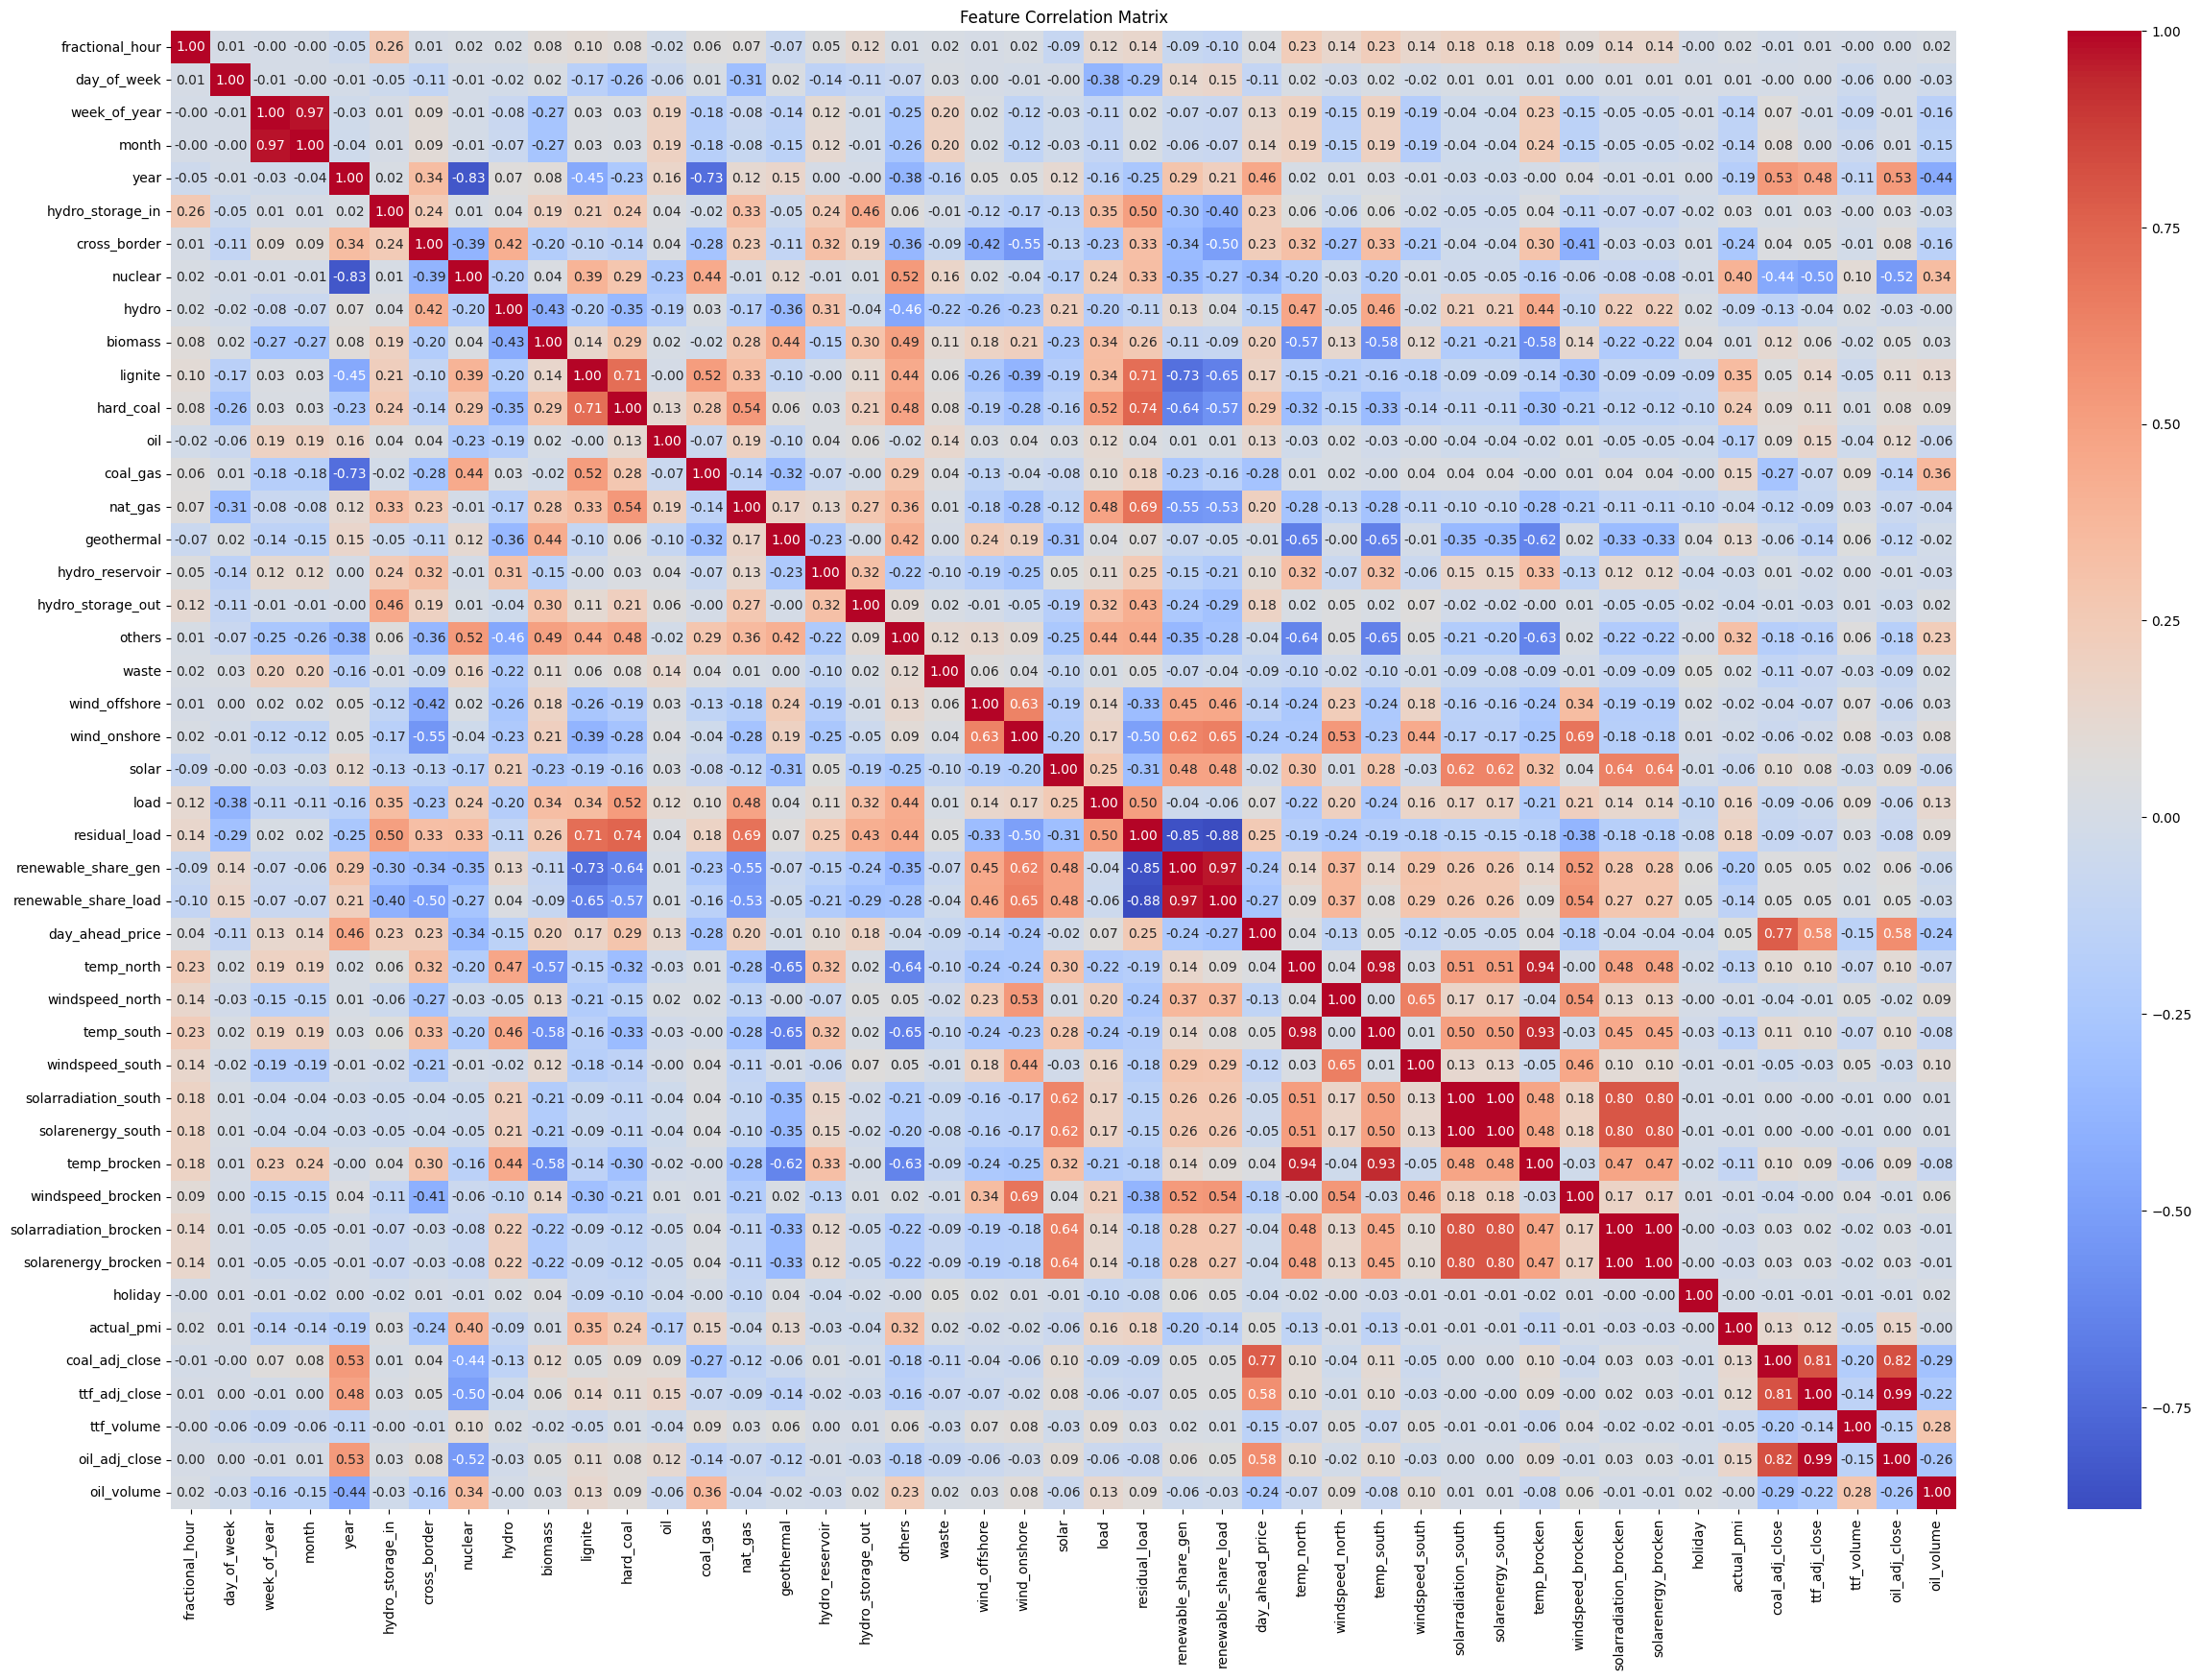

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [5]:
def initialize_model():
    # $CHALLENGIFY_BEGIN
    model = models.Sequential()

    model.add(layers.Dense(10, activation='relu', input_dim = X_train.shape[-1])) # highly recommend this option
    model.add(layers.Dense(7, activation='relu'))                                 # instead of input_dim = 13
    model.add(layers.Dense(1, activation='linear'))

    return model
    # $CHALLENGIFY_END


In [6]:
model = initialize_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________


2023-12-05 11:30:23.086229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 11:30:23.086751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-05 11:30:23.086938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-12-05 11:30:23.087100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-12-05 11:30:23.087227: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [7]:
def compile_model(model, optimizer_name):
    # $CHALLENGIFY_BEGIN
    model.compile(
        loss = 'mse',
        optimizer = optimizer_name,
        metrics = ['mae']
    )

    return model


In [8]:
model = compile_model(initialize_model(), 'adam')

es = EarlyStopping(
    patience =10,
    restore_best_weights = True
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    batch_size = 16,
    epochs = 1000,
    callbacks = [es],
    verbose=0
)

res = model.evaluate(X_test, y_test)[1]
res


KeyboardInterrupt: 

In [ ]:
def plot_loss_mae(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=200)
    ax2.set_ylim(ymin=0, ymax=20)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show()


In [ ]:
def plot_loss_mse(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=20)
    ax2.set_ylim(ymin=0, ymax=200)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show()


Epoch 1/1000
3626/3626 [==============================] - 12s 3ms/step - loss: 0.2693 - mae: 0.3271 - val_loss: 0.2815 - val_mae: 0.3626
Epoch 2/1000
3626/3626 [==============================] - 13s 3ms/step - loss: 0.2666 - mae: 0.3296 - val_loss: 0.1583 - val_mae: 0.2773
Epoch 3/1000
3626/3626 [==============================] - 12s 3ms/step - loss: 0.2518 - mae: 0.3235 - val_loss: 0.2697 - val_mae: 0.3156
Epoch 4/1000
3626/3626 [==============================] - 14s 4ms/step - loss: 0.4081 - mae: 0.3876 - val_loss: 0.4400 - val_mae: 0.4133
Epoch 5/1000
3626/3626 [==============================] - 13s 3ms/step - loss: 0.4636 - mae: 0.4210 - val_loss: 0.4478 - val_mae: 0.4024
Epoch 6/1000
3626/3626 [==============================] - 12s 3ms/step - loss: 0.4631 - mae: 0.4259 - val_loss: 0.5705 - val_mae: 0.4304
Epoch 7/1000
3626/3626 [==============================] - 13s 3ms/step - loss: 0.4369 - mae: 0.4225 - val_loss: 0.4682 - val_mae: 0.4607
Epoch 8/1000
3626/3626 [=================

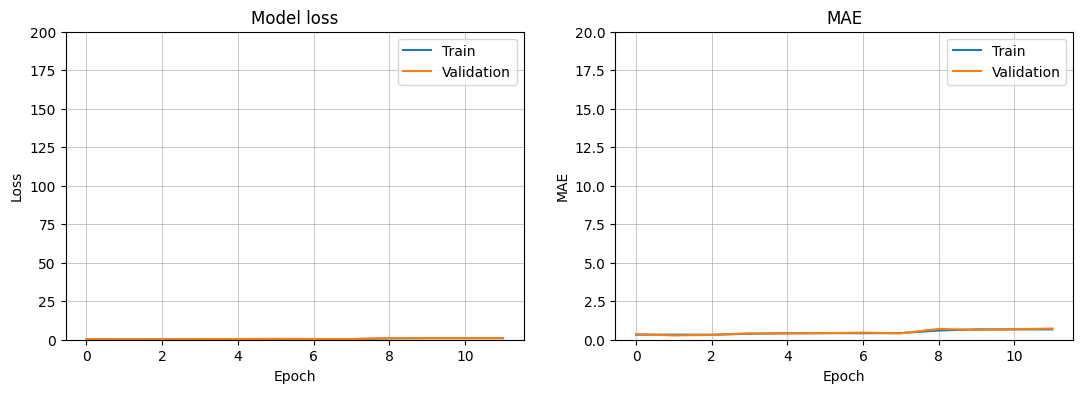

CPU times: user 3min 51s, sys: 1min 21s, total: 5min 13s
Wall time: 2min 32s


In [ ]:
%%time

# 1. Instantiating the Adam optimizer with a learning rate alpha = 0.1
adam = Adam(learning_rate = 0.1)

# 2. Initializing the model
model = initialize_model()

# 3. Compiling the model with the custom Adam optimizer
model = compile_model(model, adam)

# 4. Training the neural net
es = EarlyStopping(patience = 10)
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    batch_size=16,
    epochs = 1_000,
    callbacks = [es],
    verbose = 1
)

# 5. Plot the history and evaluate the model
res = model.evaluate(X_test, y_test)[1]
res
print(f'Mean absolute error with a learning rate of 0.1: {res:.4f}')
plot_loss_mae(history)


In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
results = []

for learning_rate in learning_rates:
    # $CHALLENGIFY_BEGIN

    # 1. Instantiating the Adam optimizer with a specific learning_rate
    adam = Adam(learning_rate = learning_rate)

    # 2. Initializing the model
    model = initialize_model()

    # 3. Compiling the model with the custom Adam optimizer
    model = compile_model(model, adam)

    # 4. Training the neural net
    es = EarlyStopping(patience = 10)
    history = model.fit(
        X_train,
        y_train,
        validation_split = 0.3,
        shuffle = True,
        batch_size=16,
        epochs = 1_000,
        callbacks = [es],
        verbose = 0
    )

    # 5. Plot the history and evaluate the model
    res = model.evaluate(X_test, y_test)[1]
    results.append(res)

    print(f'MAE with a learning rate of {learning_rate} --> {res:.4f}')
    plot_loss_mae(history)

    # $CHALLENGIFY_END


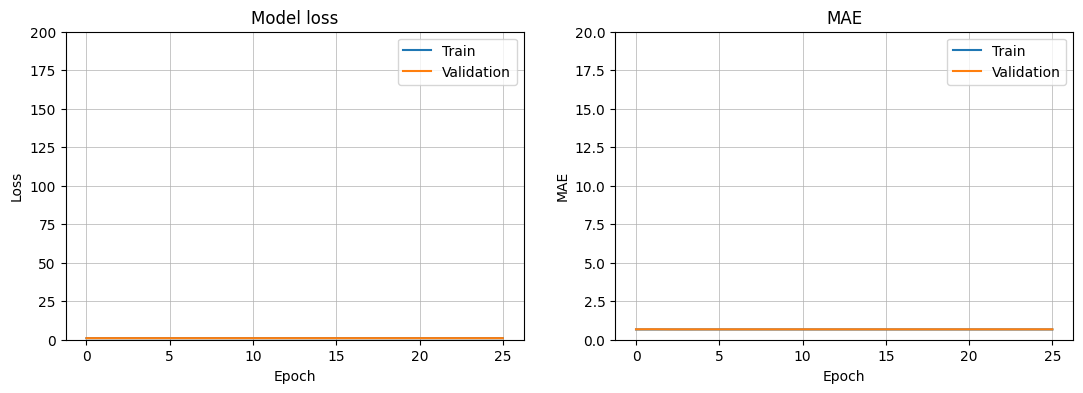

648/648 [==============================] - 2s 2ms/step - loss: 1.0032 - mae: 0.6686


0.6686264276504517

In [ ]:
####################################
#                      1. Initializing the model                           #
####################################

model.add(layers.Dense(30, activation='relu', input_dim = X_train.shape[-1]))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

####################################
#                       2. Compiling the model                         #
####################################

# ------------------------- #
#     2.1. The Learning Rate      #
# ------------------------- #

# Starting with the initial learning rate
initial_learning_rate = 0.01

# We can decrease the Learning Rate progressively as the network
# converges; more details on that in the optional section! Students
# are not expected to implement the Exponential Decay here unless
# they are already familiar with it, but I doubt it!

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps = 2000,
    decay_rate = 0.5
)

adam = Adam(learning_rate = lr_schedule)

# ------------------------------------------ #
#  2.2. Compiling with the customized Adam   #
# ------------------------------------------ #

model = compile_model(model, adam)

####################################
#                             3. Fit the model                                 #
####################################

es = EarlyStopping(patience = 20)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    batch_size=16,
    epochs = 1000,
    callbacks = [es],
    verbose = 0
)

####################################
#                4. Analyzing the loss over time                  #
####################################

plot_loss_mae(history)

####################################
#                     5. Evaluating the results                         #
####################################

mae_test = model.evaluate(X_test, y_test)[1]
mae_test


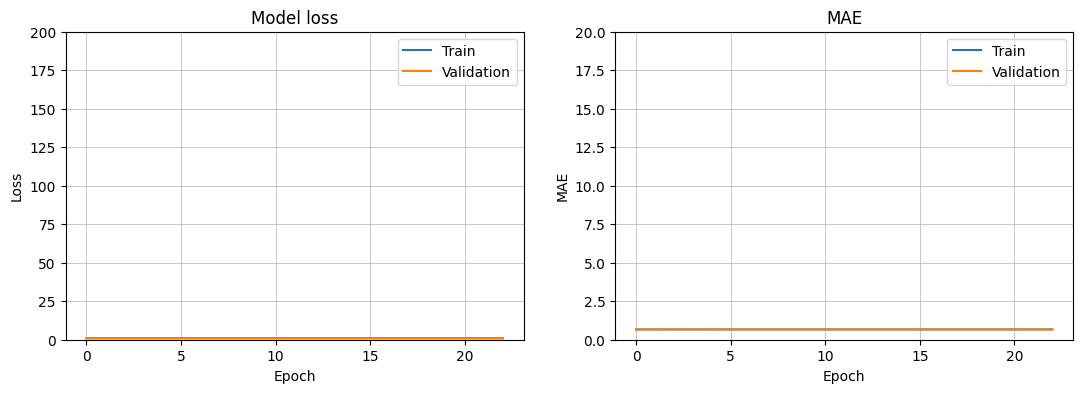

648/648 [==============================] - 1s 2ms/step - loss: 1.0032 - mae: 0.6686


0.6685518622398376

In [ ]:
####################################
#                      1. Initializing the model                           #
####################################

model.add(layers.Dense(30, activation='relu', input_dim = X_train.shape[-1]))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

####################################
#                       2. Compiling the model                         #
####################################

# ------------------------- #
#     2.1. The Learning Rate      #
# ------------------------- #

# Starting with the initial learning rate
initial_learning_rate = 0.01

# We can decrease the Learning Rate progressively as the network
# converges; more details on that in the optional section! Students
# are not expected to implement the Exponential Decay here unless
# they are already familiar with it, but I doubt it!

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps = 2000,
    decay_rate = 0.5
)

adam = Adam(learning_rate = lr_schedule)

# ------------------------------------------ #
#  2.2. Compiling with the customized Adam   #
# ------------------------------------------ #

model = compile_model(model, adam)

####################################
#                             3. Fit the model                                 #
####################################

es = EarlyStopping(patience = 20)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    shuffle = True,
    batch_size=16,
    epochs = 1000,
    callbacks = [es],
    verbose = 0
)

####################################
#                4. Analyzing the loss over time                  #
####################################

plot_loss_mae(history)

####################################
#                     5. Evaluating the results                         #
####################################

mae_test = model.evaluate(X_test, y_test)[1]
mae_test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


NameError: name 'X_train' is not defined

In [30]:
sns.pairplot(X_train.sample(500)) # Sampling is used here to reduce computational load
plt.show()


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5ced229000> (for post_execute):


KeyboardInterrupt: 